Lab #2

**Nombre:** Joan Daniel Rivas Andrade

Importar librerias

In [16]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Cargamos el dataset

In [ ]:
# Cargar el dataset (Ajustar la ruta del archivo)
data = pd.read_csv("data.csv")

# 1. Identificar características (variables) y tipos de datos
print(data.info())
print(data.head())

diagnosis
B    357
M    212
Name: count, dtype: int64
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst  

<ipython-input-17-ac0f7027a123>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='Set2')


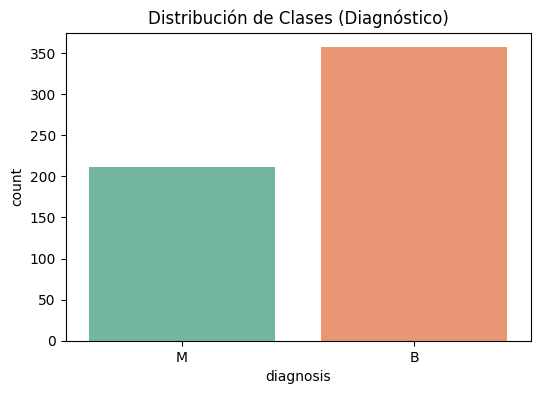

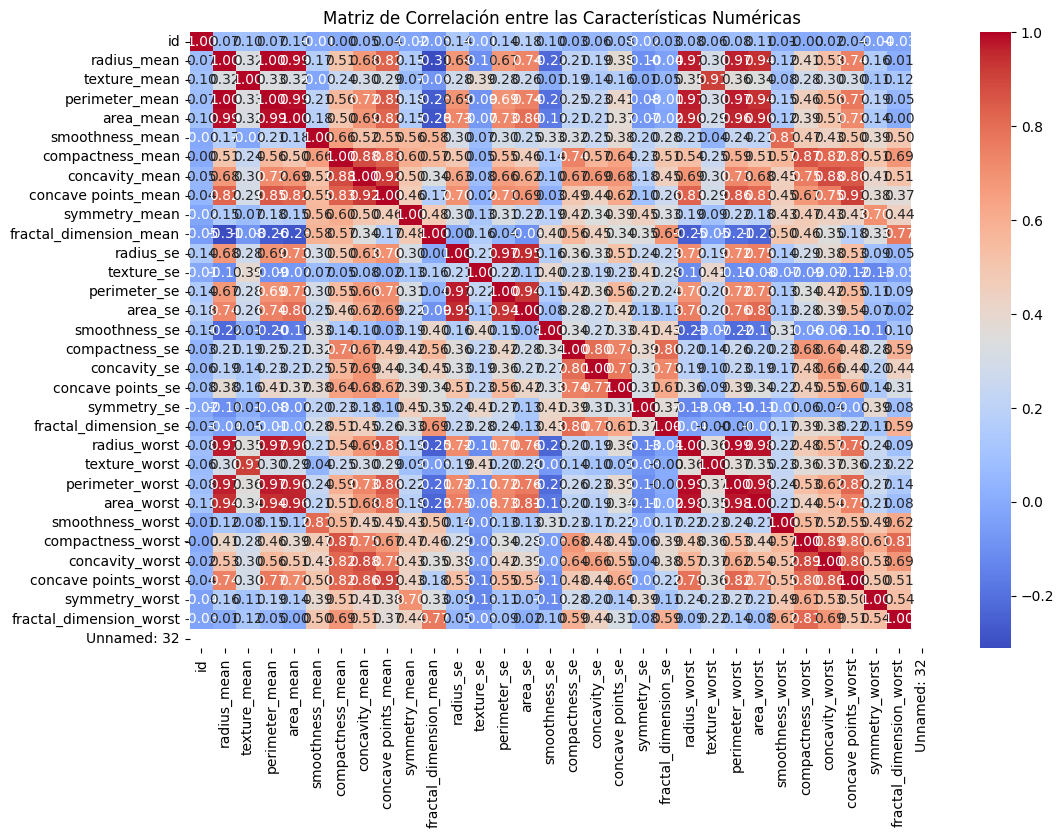

In [17]:


# 2. Ver distribución de la variable objetivo (diagnosis)
print(data['diagnosis'].value_counts())

# 3. Verificar si hay valores nulos
print(data.isnull().sum())

# 4. Visualizar la distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.title('Distribución de Clases (Diagnóstico)')
plt.show()

# Seleccionar solo las columnas numéricas
data_numerico = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para columnas numéricas
plt.figure(figsize=(12,8))
sns.heatmap(data_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre las Características Numéricas')
plt.show()




In [18]:
# Comprobar si hay valores faltantes
print(data.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [25]:
pip install ydata-profiling


In [20]:
from ydata_profiling import ProfileReport

# Generar el informe de perfilado
profile = ProfileReport(data, title='Informe de Análisis Exploratorio', explorative=True)

# Guardar el informe en un archivo HTML
profile.to_file("informe_exploratorio.html")

# Mostrar el informe en un notebook
profile.to_notebook_iframe()


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7d9c34a4b3c0, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

 Preprocesamiento de los Datos

In [21]:
# Convertir la variable objetivo 'diagnosis' a valores binarios: M -> 1, B -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Eliminar la columna 'id' ya que no aporta valor al análisis
data = data.drop(columns=['id'])

# Dividir el dataset en variables independientes (X) y dependiente (y)
X = data.drop(columns=['diagnosis'])  # Características
y = data['diagnosis']  # Objetivo


Dividir los Datos en Entrenamiento y Prueba

In [22]:
# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (455, 31)
Tamaño del conjunto de prueba: (114, 31)




Entrenamiento del Modelo de Regresión Logística


In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Convertir X_train y X_test a DataFrames si no lo son
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Crear un imputador que reemplaza NaN con la media de la columna
imputador = SimpleImputer(strategy='mean')

# Ajustar el imputador y transformar los datos
X_train_imputado = imputador.fit_transform(X_train_df)
X_test_imputado = imputador.transform(X_test_df)

# Convertir los datos imputados a arrays de numpy
X_train = X_train_imputado
X_test = X_test_imputado

# Verificar la presencia de NaN en X_train después de imputar
import numpy as np
print("Número de NaNs en X_train después de imputar:", np.isnan(X_train).sum())

# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = modelo.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Número de NaNs en X_train después de imputar: 0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluacion del modelo

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision:.2f}')



Precisión del modelo: 0.96
